In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Dropout
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

#### Context
High precision and reliable wind speed forecasting is a challenge for meteorologists. Severe wind due to convective storms, causes considerable damages (large scale forest damage, outage, buildings/houses damage, etc.). Convective events such as thunderstorms, tornadoes as well as large hail, strong winds, are natural hazards that have the potential to disrupt daily life, especially over complex terrain favoring the initiation of convection. Even ordinary convective events produce severe winds which causes fatal and costly damages. Therefore, wind speed prediction is an important task to get advanced severe weather warning. This dataset contains the responses of a weather sensor that collected different weather variables such as temperatures and precipitation.

#### Content
The dataset contains 6574 instances of daily averaged responses from an array of 5 weather variables sensors embedded in a meteorological station. The device was located on the field in a significantly empty area, at 21M. Data were recorded from January 1961 to December 1978 (17 years). Ground Truth daily averaged precipitations, maximum and minimum temperatures, and grass minimum temperature were provided.

#### Attribute Information
- DATE (YYYY-MM-DD)
- WIND: Average wind speed [knots]
- IND: First indicator value
- RAIN: Precipitation Amount (mm)
- IND.1: Second indicator value
- T.MAX: Maximum Temperature (°C)
- IND.2: Third indicator value
- T.MIN: Minimum Temperature (°C)
- T.MIN.G: 09utc Grass Minimum Temperature (°C)

In [2]:
data = pd.read_csv("wind_dataset.csv")

In [3]:
data.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [4]:
data.rename(columns={"IND":"IND1", "IND.1":"IND2", "IND.2":"IND3"}, inplace=True)

In [5]:
data

,DATE,WIND,IND1,RAIN,IND2,T.MAX,IND3,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5
...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0
6570,1978-12-28,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0
6571,1978-12-29,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2
6572,1978-12-30,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND1     6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND2     6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND3     6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


In [7]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6569    False
6570    False
6571    False
6572    False
6573    False
Length: 6574, dtype: bool

In [8]:
data["DATE"] = pd.to_datetime(data["DATE"])

In [9]:
data = data.set_index("DATE")

In [10]:
data.head(5)

,WIND,IND1,RAIN,IND2,T.MAX,IND3,T.MIN,T.MIN.G
DATE,,,,,,,,
1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [11]:
data.count()

WIND       6574
IND1       6574
RAIN       6574
IND2       6513
T.MAX      5953
IND3       6513
T.MIN      5900
T.MIN.G    6214
dtype: int64

<AxesSubplot:>

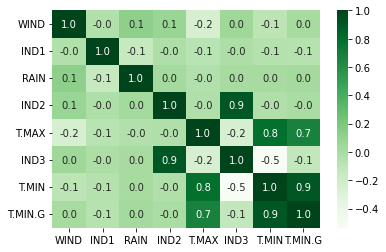

In [12]:
sns.heatmap(data.corr(), annot=True, cmap="Greens", fmt=".1f")

c:\Users\Rodrigo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Rodrigo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Rodrigo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Rodrigo\anaconda

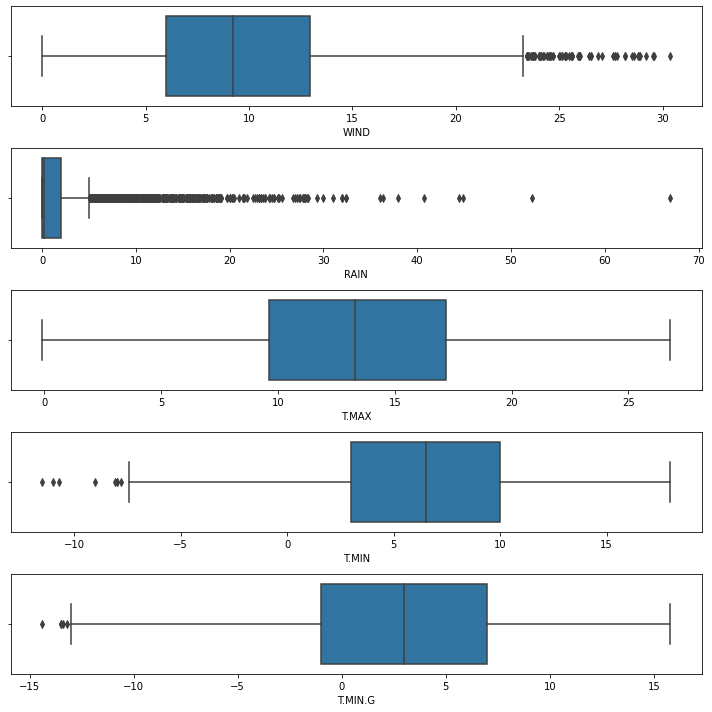

In [13]:
fig, axs = plt.subplots(5, figsize=(10, 10))
sns.boxplot(data["WIND"], ax=axs[0])
sns.boxplot(data["RAIN"], ax=axs[1])
sns.boxplot(data["T.MAX"], ax=axs[2])
sns.boxplot(data["T.MIN"], ax=axs[3])
sns.boxplot(data["T.MIN.G"], ax=axs[4])
fig.tight_layout()
plt.show()

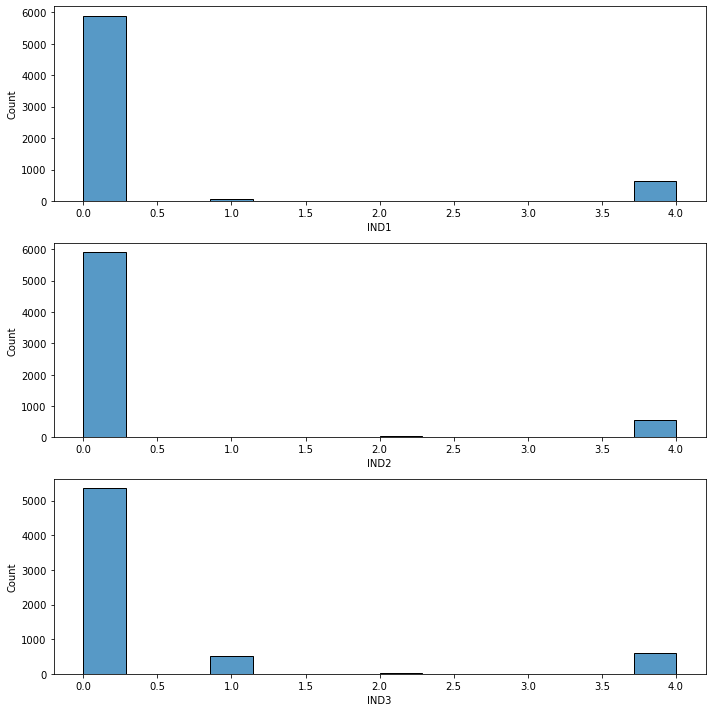

In [14]:
fig, axs = plt.subplots(3, figsize=(10, 10))
sns.histplot(data["IND1"], ax=axs[0])
sns.histplot(data["IND2"], ax=axs[1])
sns.histplot(data["IND3"], ax=axs[2])
fig.tight_layout()
plt.show()

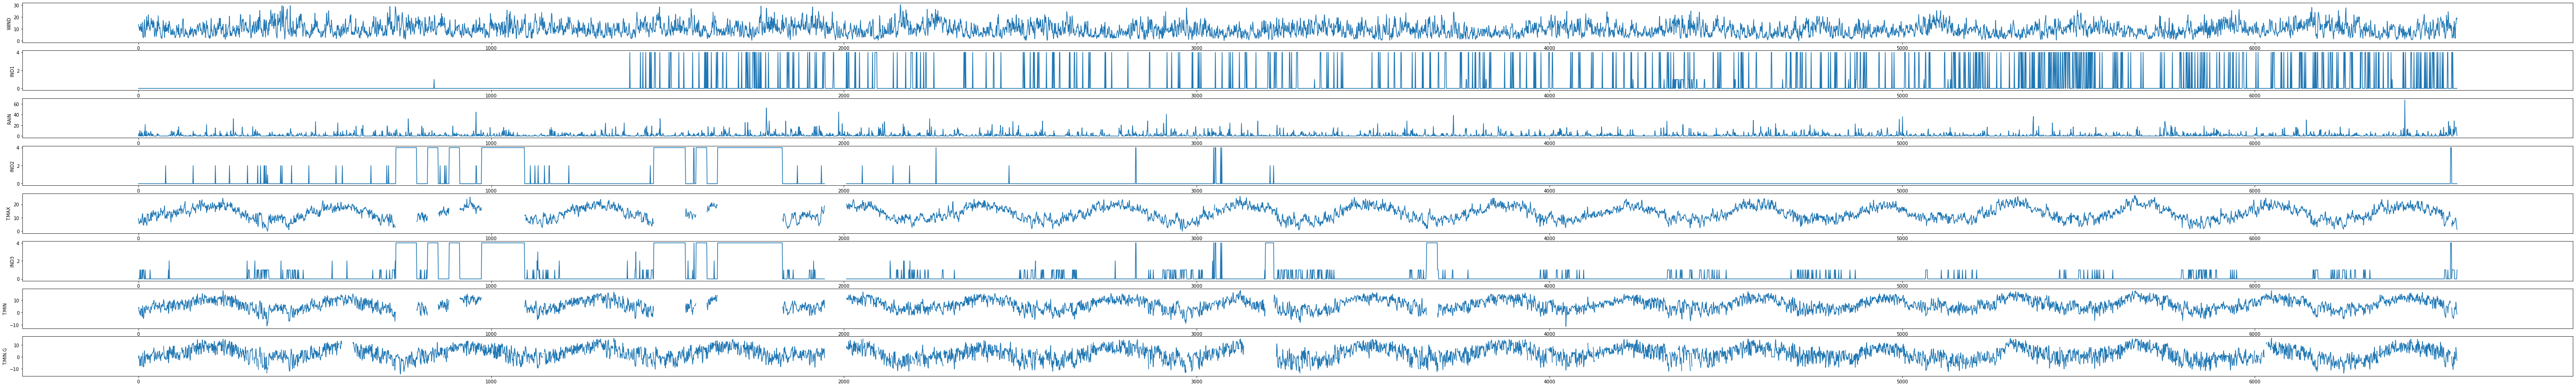

In [15]:
values = data.values

groups = [g  for g in range(8)]

i = 1

plt.figure(figsize=(100, 15))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.ylabel(data.columns[group])
    i += 1
plt.show()

As features IND1, IND2 e IND3 parecem estar correlacionadas com as restantes features. Pelo plot das diferentes features, os valores de IND1, IND2 e IND3 são inteiros e parecem classificar a variação nos valores das features Temperature and IND (quando alguma desta features assume o valor NaN, o indicador correspondente assume o valor 4).

O autor do dataset foi questionado sobre o significado desta variáveis, para melhor entender o dataset, mas não se obteve resposta.

Estes indicadores serão desconsiderados.

In [16]:
dframe = data.drop(["IND1", "IND2", "IND3"], axis=1)

In [17]:
dframe.head()

,WIND,RAIN,T.MAX,T.MIN,T.MIN.G
DATE,,,,,
1961-01-01,13.67,0.2,9.5,3.7,-1.0
1961-01-02,11.50,5.1,7.2,4.2,1.1
1961-01-03,11.25,0.4,5.5,0.5,-0.5
1961-01-04,8.63,0.2,5.6,0.4,-3.2
1961-01-05,11.92,10.4,7.2,-1.5,-7.5


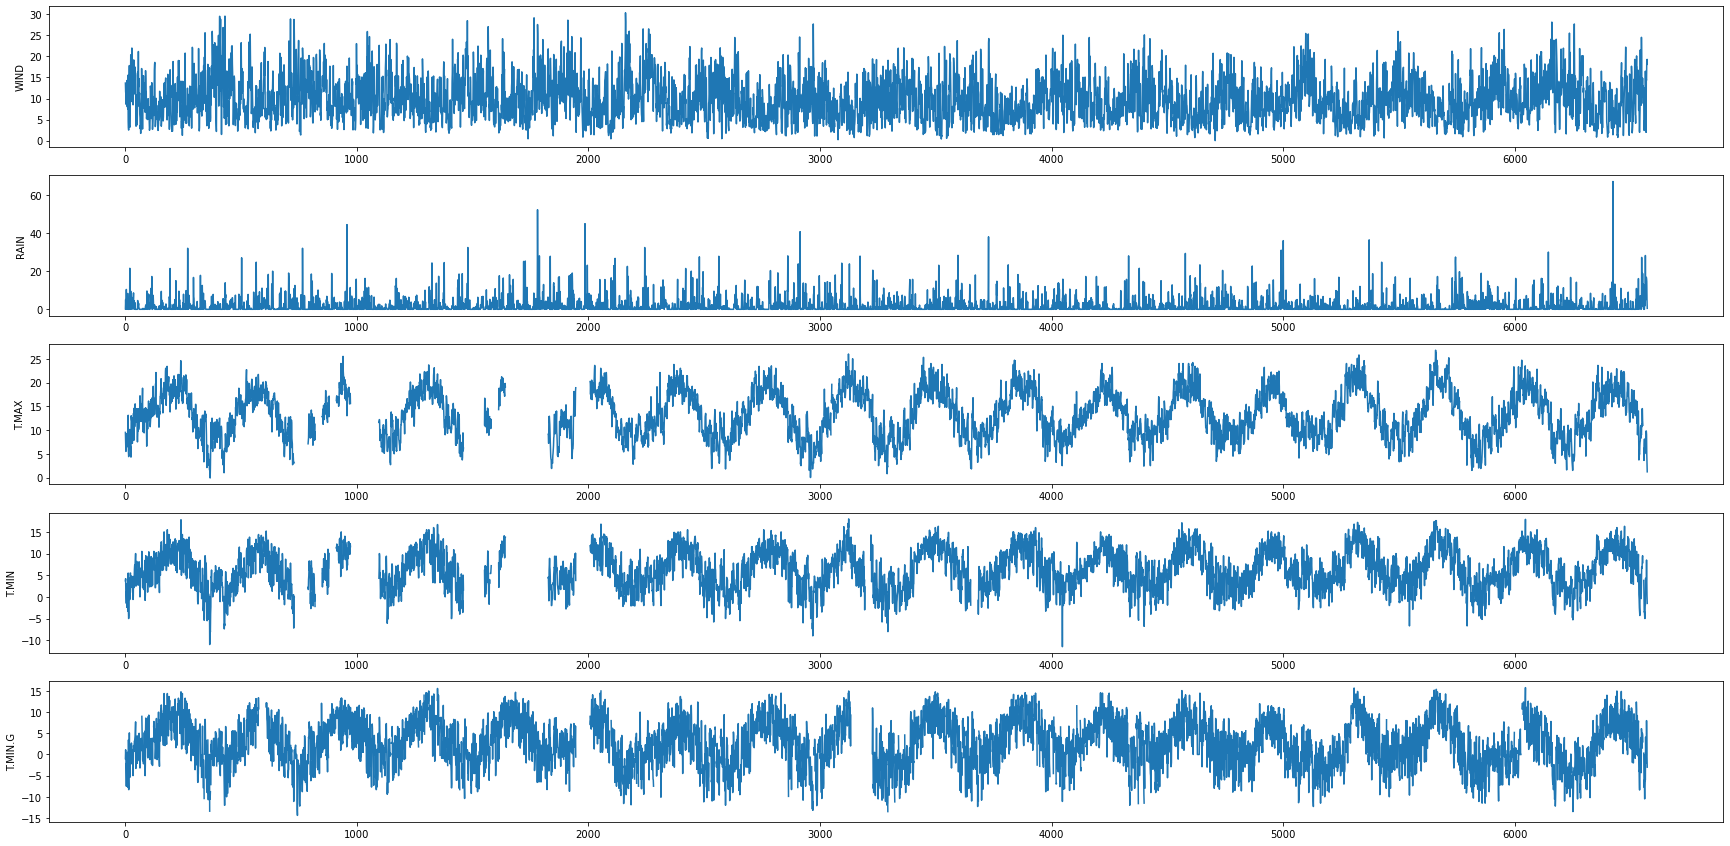

In [18]:
values = dframe.values

groups = [g  for g in range(dframe.shape[1])]

i = 1

plt.figure(figsize=(30, 15))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.ylabel(dframe.columns[group])
    i += 1
plt.show()

### Deal with missing values

In [19]:
dframe

,WIND,RAIN,T.MAX,T.MIN,T.MIN.G
DATE,,,,,
1961-01-01,13.67,0.2,9.5,3.7,-1.0
1961-01-02,11.50,5.1,7.2,4.2,1.1
1961-01-03,11.25,0.4,5.5,0.5,-0.5
1961-01-04,8.63,0.2,5.6,0.4,-3.2
1961-01-05,11.92,10.4,7.2,-1.5,-7.5
...,...,...,...,...,...
1978-12-27,14.46,16.8,9.8,4.0,0.0
1978-12-28,14.33,16.0,9.1,8.5,8.0
1978-12-29,19.17,14.7,5.0,3.5,3.2


In [20]:
dframe.notna().value_counts()

WIND  RAIN  T.MAX  T.MIN  T.MIN.G
True  True  True   True   True       5638
            False  False  True        543
            True   True   False       260
            False  False  False        76
            True   False  True         31
                          False        24
            False  True   True          2
dtype: int64

<AxesSubplot:>

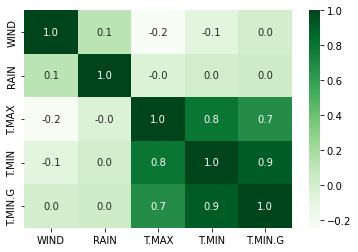

In [21]:
sns.heatmap(dframe.dropna().corr(), annot=True, cmap="Greens", fmt=".1f")

T.MAX, T.MIN e T.MIN.G são altamente correlacionadas (problema da multicolinariedade? Remover duas das três features?)

In [22]:
import miceforest as mf

In [23]:
# Create kernels. 
kernel1 = mf.ImputationKernel(
  data=dframe,
  save_all_iterations=True,
  random_state=1991
)

# Run the MICE algorithm for 3 iterations on each of the datasets
kernel1.mice(3,verbose=True)

Initialized logger with name mice 1-3
Dataset 0
1  | T.MIN.G | T.MAX | T.MIN
2  | T.MIN.G | T.MAX | T.MIN
3  | T.MIN.G | T.MAX | T.MIN


In [24]:
dframe = kernel1.complete_data(0)

In [25]:
# Create kernels. 
kernel2 = mf.ImputationKernel(
  data=data,
  save_all_iterations=True,
  random_state=1991
)

# Run the MICE algorithm for 3 iterations on each of the datasets
kernel2.mice(3,verbose=True)

data = kernel2.complete_data(0)

Initialized logger with name mice 1-3
Dataset 0
1  | IND2 | IND3 | T.MIN.G | T.MAX | T.MIN
2  | IND2 | IND3 | T.MIN.G | T.MAX | T.MIN
3  | IND2 | IND3 | T.MIN.G | T.MAX | T.MIN


In [26]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6574 entries, 1961-01-01 to 1978-12-31
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WIND     6574 non-null   float64
 1   RAIN     6574 non-null   float64
 2   T.MAX    6574 non-null   float64
 3   T.MIN    6574 non-null   float64
 4   T.MIN.G  6574 non-null   float64
dtypes: float64(5)
memory usage: 308.2 KB


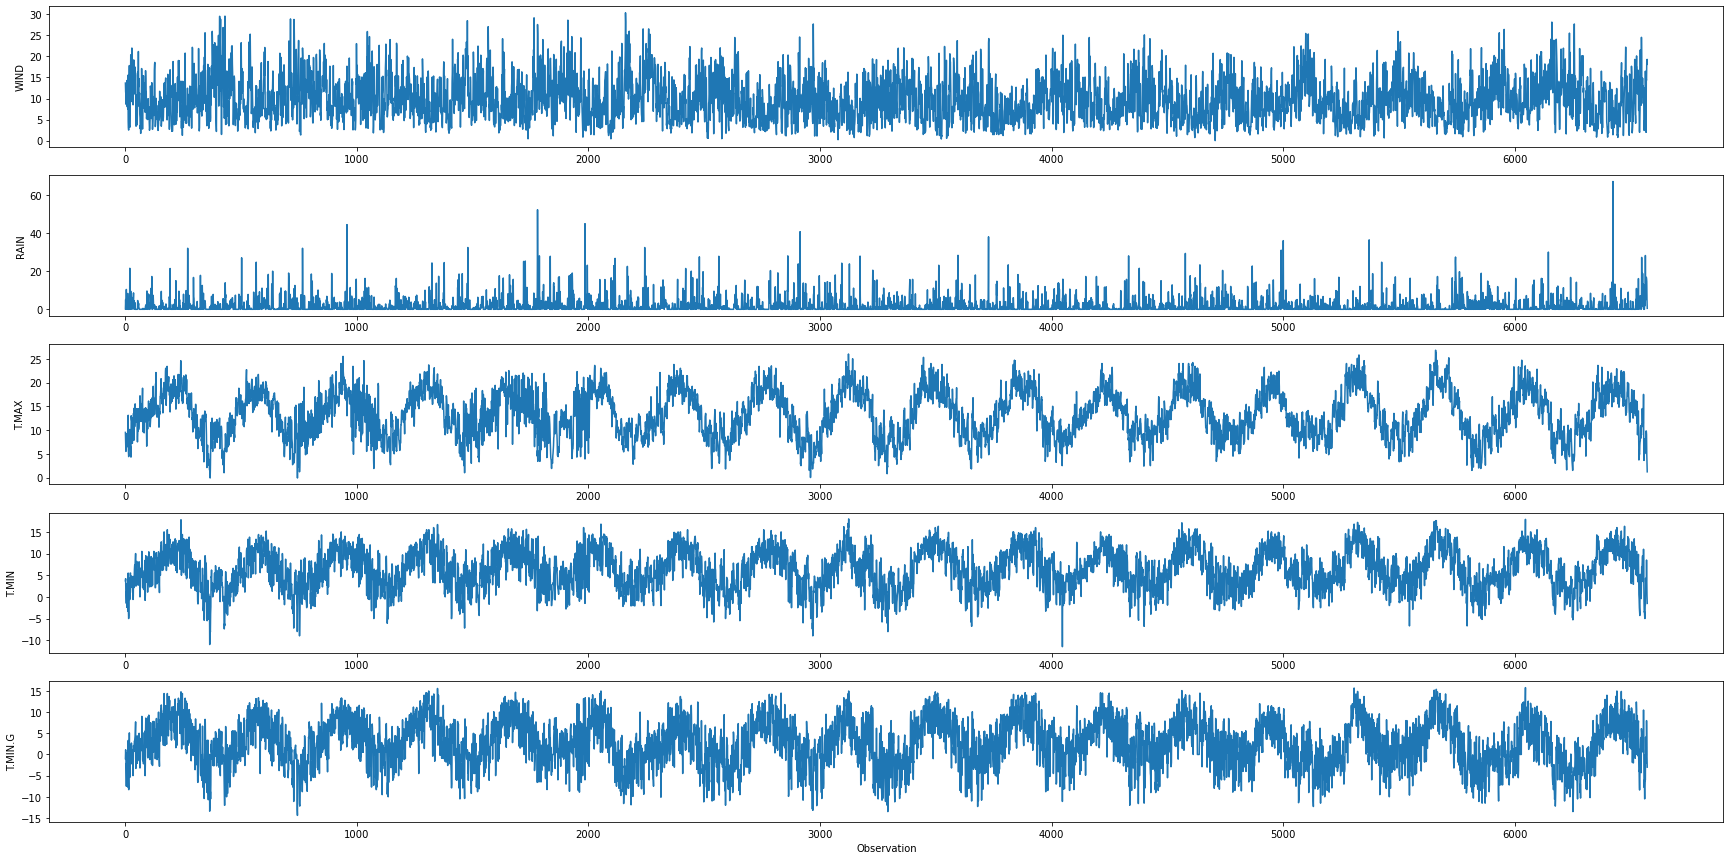

In [27]:
values = dframe.values

groups = [g  for g in range(dframe.shape[1])]

i = 1

plt.figure(figsize=(30, 15))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.ylabel(dframe.columns[group])
    i += 1
plt.xlabel("Observation")
plt.show()

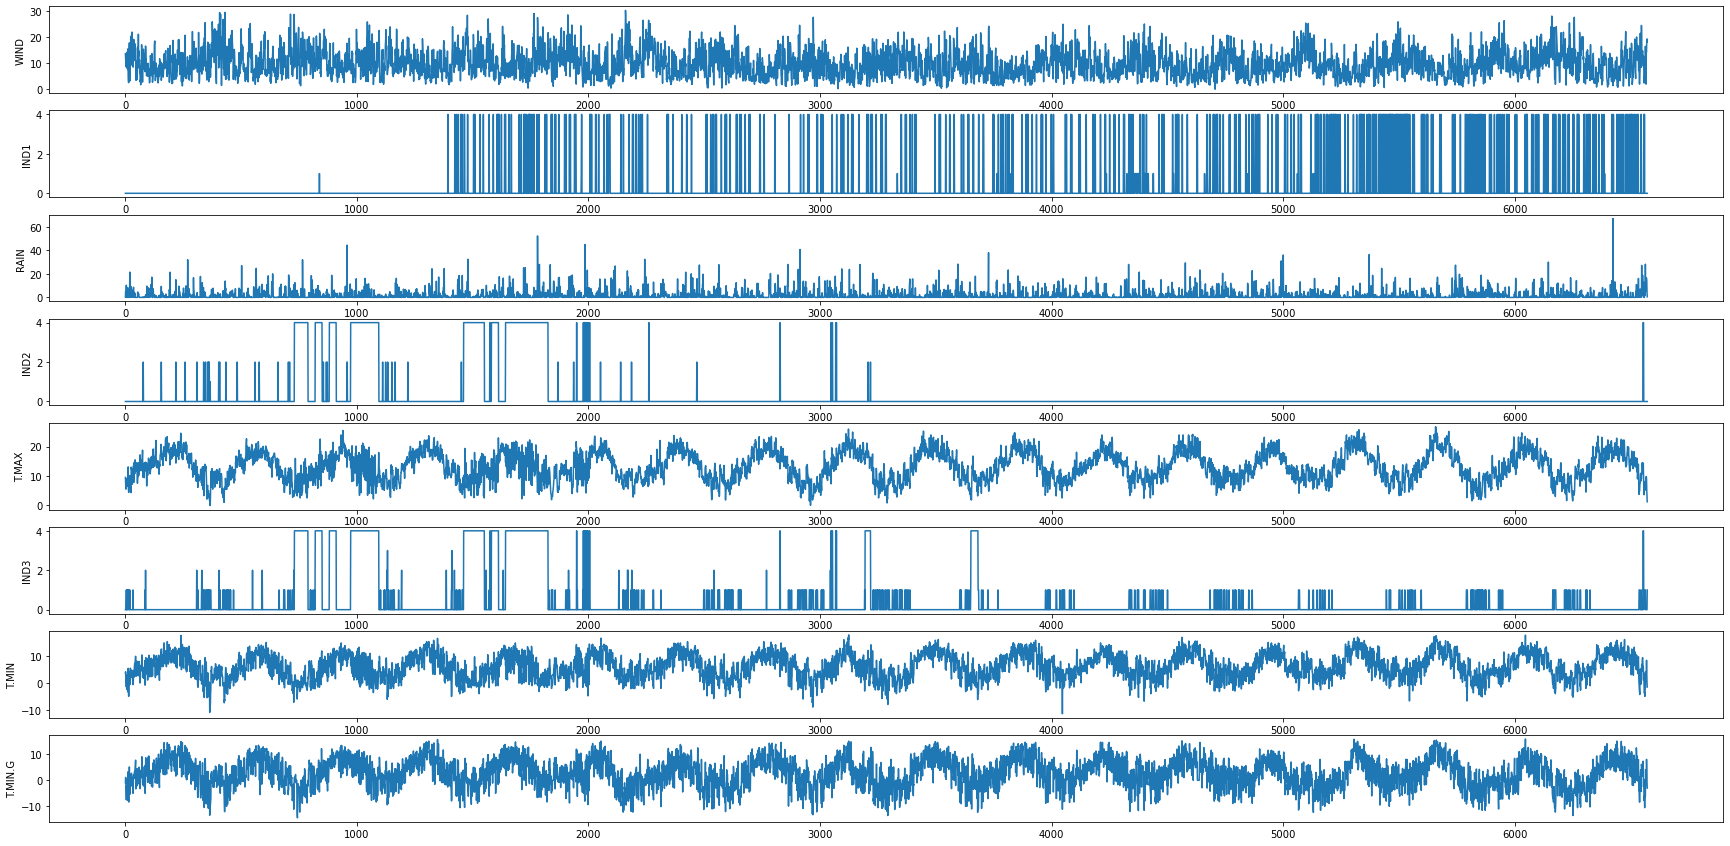

In [28]:
values = data.values

groups = [g  for g in range(data.shape[1])]

i = 1

plt.figure(figsize=(30, 15))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.ylabel(data.columns[group])
    i += 1
plt.show()

In [29]:
data.head()

,WIND,IND1,RAIN,IND2,T.MAX,IND3,T.MIN,T.MIN.G
DATE,,,,,,,,
1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [30]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [31]:
y

DATE
1961-01-01    13.67
1961-01-02    11.50
1961-01-03    11.25
1961-01-04     8.63
1961-01-05    11.92
              ...  
1978-12-27    14.46
1978-12-28    14.33
1978-12-29    19.17
1978-12-30    18.08
1978-12-31    19.25
Name: WIND, Length: 6574, dtype: float64

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
Xnorm = scaler.fit_transform(np.array(X))
Xnorm.shape

(6574, 7)

In [33]:
X_norm = pd.DataFrame(Xnorm, index=X.index , columns=X.columns)

In [34]:
X_norm.head()

,IND1,RAIN,IND2,T.MAX,IND3,T.MIN,T.MIN.G
DATE,,,,,,,
1961-01-01,0.0,0.002985,0.0,0.356877,0.00,0.515254,0.443709
1961-01-02,0.0,0.076119,0.0,0.271375,0.00,0.532203,0.513245
1961-01-03,0.0,0.005970,0.0,0.208178,0.00,0.406780,0.460265
1961-01-04,0.0,0.002985,0.0,0.211896,0.00,0.403390,0.370861
1961-01-05,0.0,0.155224,0.0,0.271375,0.25,0.338983,0.228477


In [35]:
pd.concat([X_norm, y], join="outer", axis=1)

,IND1,RAIN,IND2,T.MAX,IND3,T.MIN,T.MIN.G,WIND
DATE,,,,,,,,
1961-01-01,0.0,0.002985,0.0,0.356877,0.00,0.515254,0.443709,13.67
1961-01-02,0.0,0.076119,0.0,0.271375,0.00,0.532203,0.513245,11.50
1961-01-03,0.0,0.005970,0.0,0.208178,0.00,0.406780,0.460265,11.25
1961-01-04,0.0,0.002985,0.0,0.211896,0.00,0.403390,0.370861,8.63
1961-01-05,0.0,0.155224,0.0,0.271375,0.25,0.338983,0.228477,11.92
...,...,...,...,...,...,...,...,...
1978-12-27,0.0,0.250746,0.0,0.368030,0.00,0.525424,0.476821,14.46
1978-12-28,0.0,0.238806,0.0,0.342007,0.00,0.677966,0.741722,14.33
1978-12-29,0.0,0.219403,0.0,0.189591,0.00,0.508475,0.582781,19.17


In [36]:
corrMatrix = pd.concat([X_norm, y], join="outer", axis=1).corr()

<AxesSubplot:>

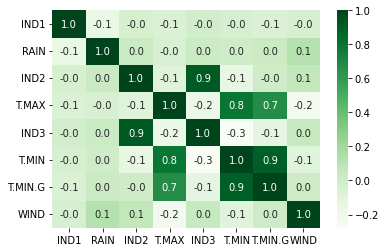

In [37]:
sns.heatmap(corrMatrix, annot=True, cmap="Greens", fmt=".1f")

In [38]:
X_norm.drop(["IND1", "IND2", "IND3"], axis=1, inplace=True)

In [39]:
X_norm["YEAR"] = X_norm.index.year
X_norm["MONTH"] = X_norm.index.month
X_norm["DAY"] = X_norm.index.day

In [40]:
X_norm.head()

,RAIN,T.MAX,T.MIN,T.MIN.G,YEAR,MONTH,DAY
DATE,,,,,,,
1961-01-01,0.002985,0.356877,0.515254,0.443709,1961,1,1
1961-01-02,0.076119,0.271375,0.532203,0.513245,1961,1,2
1961-01-03,0.005970,0.208178,0.406780,0.460265,1961,1,3
1961-01-04,0.002985,0.211896,0.403390,0.370861,1961,1,4
1961-01-05,0.155224,0.271375,0.338983,0.228477,1961,1,5


### Train/Test split

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25,random_state=0, shuffle=True)

In [55]:
X_dev, X_new_test, y_dev, y_new_dev = train_test_split(X_train, y_train, test_size=0.5,random_state=0, shuffle=True)

Model and hyper parameter selection
1.	Optimize parameters theta (to minimize some cost function) using the training set for all models. Compute some performance metrics with training data.
2.	Test the optimized models from step 1 with the Development set and choose the model with the min cross validation error (or other performance metric with dev data).
3.	Retrain the best model from step 2 with both train and dev sets starting from the parameters got at step 2. Test the retrained model with test set and compute teste data performance metric (the real model performance)


In [93]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn import metrics

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_pred = lin_reg.predict(X_train)

print('MAE:', metrics.mean_absolute_error(y_train, lin_pred))
print('MSE:', metrics.mean_squared_error(y_train, lin_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, lin_pred)))

MAE: 3.7533617407460063
MSE: 22.14294919123814
RMSE: 4.70562952124773


In [91]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_train)

print('MAE:', metrics.mean_absolute_error(y_train, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_train, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, rfr_pred)))

MAE: 3.698362445178195
MSE: 21.67488621781343
RMSE: 4.6556295189601835


In [92]:
# Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(max_depth=2, random_state=0)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_train)

print('MAE:', metrics.mean_absolute_error(y_train, gbr_pred))
print('MSE:', metrics.mean_squared_error(y_train, gbr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, gbr_pred)))

MAE: 3.3680192553048784
MSE: 18.15908771082324
RMSE: 4.261348109556791


In [95]:
X_norm.shape

(6574, 7)

In [87]:
# LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(300,7)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 300, 50)           11600     
                                                                 
 lstm_7 (LSTM)               (None, 300, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 52,051
Trainable params: 52,051
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100


ValueError: in user code:

    File "c:\Users\Rodrigo\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Rodrigo\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Rodrigo\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Rodrigo\anaconda3\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\Rodrigo\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Rodrigo\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 300, 7), found shape=(None, 7)


In [96]:
rmse_scores_linreg = cross_val_score(estimator=lin_reg, X=X_norm, y=y, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
rmse_scores_linreg = -1 * rmse_scores_linreg   ## we want it positive
rmse_scores_linreg = np.sqrt(rmse_scores_linreg)
print(f'RMSE Scores Using LinearRegression --- {np.round(rmse_scores_linreg, 4)}')
print(f'Mean of RMSE Scores Using LinearRegression --- {rmse_scores_linreg.mean():.4f}')

RMSE Scores Using LinearRegression --- [4.9673 4.7595 4.8594 5.1496 4.4581 4.6324 4.2861 4.4931 4.186  5.2291]
Mean of RMSE Scores Using LinearRegression --- 4.7020


In [97]:
rmse_scores_rfr = cross_val_score(estimator=rfr, X=X_norm, y=y, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
rmse_scores_rfr = -1 * rmse_scores_rfr   ## we want it positive
rmse_scores_rfr = np.sqrt(rmse_scores_rfr)
print(f'RMSE Scores Using Random Forest --- {np.round(rmse_scores_rfr, 4)}')
print(f'Mean of RMSE Scores Using Random Forest --- {rmse_scores_rfr.mean():.4f}')

RMSE Scores Using Random Forest --- [4.9409 4.8812 4.8542 4.9474 4.4187 4.5276 4.2411 4.4477 4.3044 4.8741]
Mean of RMSE Scores Using Random Forest --- 4.6437


In [98]:
rmse_scores_gbr = cross_val_score(estimator=gbr, X=X_norm, y=y, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
rmse_scores_gbr = -1 * rmse_scores_gbr   ## we want it positive
rmse_scores_gbr = np.sqrt(rmse_scores_gbr)
print(f'RMSE Scores Using GradientBoosting --- {np.round(rmse_scores_gbr, 4)}')
print(f'Mean of RMSE Scores Using GradientBoosting --- {rmse_scores_gbr.mean():.4f}')

RMSE Scores Using GradientBoosting --- [4.6796 4.5337 4.5555 4.7264 4.2255 4.2884 4.0782 4.1616 4.1256 4.9133]
Mean of RMSE Scores Using GradientBoosting --- 4.4288


In [99]:
# GridSearch for Gradient Boosting

# params

parameters = {
    "loss" : ["squared_error", "absolute_error", "quantile"],
    "learning_rate" : [0.05, 0.1, 0.2, 0.5, 1],
    "n_estimators" : [100, 200, 500],
    "max_depth" : [3, 4, 5]
}

gs = GridSearchCV(estimator=gbr,
                  param_grid=parameters,
                  scoring=["r2", "neg_root_mean_squared_error"],
                  refit = "r2",
                  cv = 5,
                  verbose=10)

In [100]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 135 candidates, totalling 675 fits
[CV 1/5; 1/135] START learning_rate=0.05, loss=squared_error, max_depth=3, n_estimators=100
[CV 1/5; 1/135] END learning_rate=0.05, loss=squared_error, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-4.244) r2: (test=0.240) total time=   0.3s
[CV 2/5; 1/135] START learning_rate=0.05, loss=squared_error, max_depth=3, n_estimators=100
[CV 2/5; 1/135] END learning_rate=0.05, loss=squared_error, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-4.554) r2: (test=0.256) total time=   0.2s
[CV 3/5; 1/135] START learning_rate=0.05, loss=squared_error, max_depth=3, n_estimators=100
[CV 3/5; 1/135] END learning_rate=0.05, loss=squared_error, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-4.294) r2: (test=0.239) total time=   0.2s
[CV 4/5; 1/135] START learning_rate=0.05, loss=squared_error, max_depth=3, n_estimators=100
[CV 4/5; 1/135] END learning_rate=0.05, loss=squared_error,

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=2, random_state=0),
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.5, 1],
                         'loss': ['squared_error', 'absolute_error',
                                  'quantile'],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 500]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=10)

In [101]:
gs.best_params_

{'learning_rate': 0.05,
 'loss': 'squared_error',
 'max_depth': 4,
 'n_estimators': 200}

In [102]:
gs.cv_results_

{'mean_fit_time': array([0.34196386, 0.66251626, 1.65085921, 0.42672658, 0.84455886,
        2.16315775, 0.53079796, 1.09908338, 2.65811691, 0.5407023 ,
        1.0359004 , 2.42327652, 0.75017033, 1.39030037, 3.20529165,
        1.07062917, 1.88781805, 4.14191651, 0.53210835, 1.06115046,
        2.52072735, 0.72036653, 1.39451661, 3.27811832, 0.98792362,
        1.80500846, 4.06723208, 0.32496696, 0.64514666, 1.64657235,
        0.4300972 , 0.84388881, 2.17203012, 0.52822809, 1.07763343,
        2.68326764, 0.51791449, 0.97244978, 2.40705848, 0.69841738,
        1.33329773, 3.16497703, 0.90602255, 1.72127609, 3.97930746,
        0.51110921, 0.99062543, 2.50478272, 0.68657503, 1.34061513,
        3.17889881, 0.87967196, 1.68157973, 3.92410345, 0.32864156,
        0.65000653, 1.66121078, 0.42509832, 0.83961892, 2.14655919,
        0.53512096, 1.08504672, 2.68950028, 0.48750143, 0.95541763,
        2.37971387, 0.6655221 , 1.29927688, 3.1201642 , 0.86312032,
        1.65646691, 3.88597689,

In [106]:
gs.best_score_

0.2578256198687656